In [36]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [2]:
df = pd.read_csv("C:/Users/Yash/Desktop/DS_BritishAirways/customer_booking.csv", encoding='latin1')

In [3]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [4]:
#trip type-- One hot encoding
#sales_channel-- One hot encoding
#flight day-- integer coding, data mapping
#route-- frequency encoding
#booking origin-- frequency encoding

In [5]:
#One Hot Encoding

In [6]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['trip_type','sales_channel'])
print(one_hot_encoded_data)

       num_passengers  purchase_lead  length_of_stay  flight_hour flight_day  \
0                   2            262              19            7        Sat   
1                   1            112              20            3        Sat   
2                   2            243              22           17        Wed   
3                   1             96              31            4        Sat   
4                   2             68              22           15        Wed   
...               ...            ...             ...          ...        ...   
49995               2             27               6            9        Sat   
49996               1            111               6            4        Sun   
49997               1             24               6           22        Sat   
49998               1             15               6           11        Mon   
49999               1             19               6           10        Thu   

        route booking_origin  wants_ext

In [7]:
one_hot_encoded_data['trip_type_CircleTrip'] = one_hot_encoded_data['trip_type_CircleTrip'].replace({'True': 1, 'False': 0})
one_hot_encoded_data['trip_type_OneWay'] = one_hot_encoded_data['trip_type_OneWay'].replace({'True': 1, 'False': 0})
one_hot_encoded_data['trip_type_RoundTrip'] = one_hot_encoded_data['trip_type_RoundTrip'].replace({'True': 1, 'False': 0})
one_hot_encoded_data['sales_channel_Internet'] = one_hot_encoded_data['sales_channel_Internet'].replace({'True': 1, 'False': 0})
one_hot_encoded_data['sales_channel_Mobile'] = one_hot_encoded_data['sales_channel_Mobile'].replace({'True': 1, 'False': 0})

In [8]:
df = one_hot_encoded_data

In [9]:
df['trip_type_CircleTrip'] = df['trip_type_CircleTrip'].astype(int)

In [10]:
df['trip_type_OneWay'] = df['trip_type_OneWay'].astype(int)

In [11]:
df['trip_type_RoundTrip'] = df['trip_type_RoundTrip'].astype(int)

In [12]:
df['sales_channel_Internet'] = df['sales_channel_Internet'].astype(int)

In [13]:
df['sales_channel_Mobile'] = df['sales_channel_Mobile'].astype(int)

In [14]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,sales_channel_Internet,sales_channel_Mobile
0,2,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1,1,0
1,1,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1,1,0
2,2,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0,0,1,1,0
3,1,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1,1,0
4,2,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,0,0,1,1,0


In [15]:
#mapping

In [16]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [17]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,sales_channel_Internet,sales_channel_Mobile
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1,1,0
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1,1,0
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1,1,0
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1,1,0
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1,1,0


In [18]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,sales_channel_Internet,sales_channel_Mobile
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,0,1,1,0
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,0,1,1,0
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0,0,1,1,0
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,0,1,1,0
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0,0,1,1,0


In [19]:
#frequency encoding

In [20]:
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [21]:
route_frequency = df['route'].value_counts(normalize=True)
booking_origin_frequency = df['booking_origin'].value_counts(normalize=True)

df['route_frequency_encoded'] = df['route'].map(route_frequency)
df['booking_origin_encoded'] = df['booking_origin'].map(booking_origin_frequency)

print(df)

       num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0                   2            262              19            7           6   
1                   1            112              20            3           6   
2                   2            243              22           17           3   
3                   1             96              31            4           6   
4                   2             68              22           15           3   
...               ...            ...             ...          ...         ...   
49995               2             27               6            9           6   
49996               1            111               6            4           7   
49997               1             24               6           22           6   
49998               1             15               6           11           1   
49999               1             19               6           10           4   

        route booking_origi

In [22]:
df = df.drop(columns = ['route','booking_origin'])

In [23]:
df = df.rename(columns = {'route_frequency_encoded':'route','booking_origin_encoded':'booking_origin'})

In [24]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,sales_channel_Internet,sales_channel_Mobile,route,booking_origin
0,2,262,19,7,6,1,0,0,5.52,0,0,0,1,1,0,0.0004,0.02148
1,1,112,20,3,6,0,0,0,5.52,0,0,0,1,1,0,0.0004,0.02148
2,2,243,22,17,3,1,1,0,5.52,0,0,0,1,1,0,0.0004,0.02540
3,1,96,31,4,6,0,0,1,5.52,0,0,0,1,1,0,0.0004,0.02148
4,2,68,22,15,3,1,0,1,5.52,0,0,0,1,1,0,0.0004,0.02540


In [25]:
df.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,sales_channel_Internet,sales_channel_Mobile,route,booking_origin
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116,-0.001053,-0.002195,0.002435,0.002457,-0.002457,0.009803,-0.092794
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131,0.005519,0.006452,-0.008327,0.013399,-0.013399,0.114233,-0.049196
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408,0.003102,-0.013053,0.009968,0.060352,-0.060352,0.056248,0.130259
flight_hour,0.015607,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127,0.000945,0.003050,-0.003134,-0.022375,0.022375,0.010762,-0.060005
flight_day,0.015407,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986,0.004074,-0.002426,0.000166,-0.042095,0.042095,0.014187,-0.004959
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139,0.011855,0.007847,-0.012606,0.054254,-0.054254,0.009173,0.060117
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116,-0.000407,-0.007953,0.007181,-0.032943,0.032943,-0.031345,0.080849
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511,-0.002982,-0.014442,0.014120,0.022235,-0.022235,0.007345,0.121002
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266,0.015698,0.040666,-0.043280,0.038629,-0.038629,0.257795,0.323994
booking_complete,0.024116,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000,-0.014394,-0.024240,0.028226,0.041060,-0.041060,0.037152,-0.172063


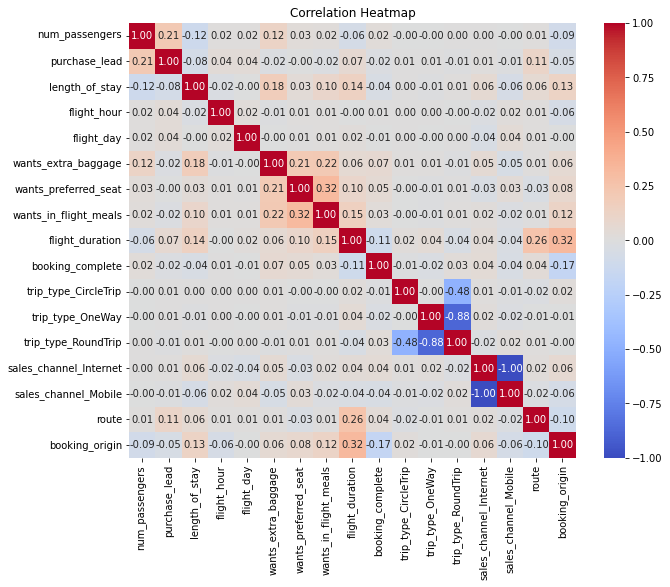

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [27]:
#num_passengers, purchase_lead, length_of_stay, flight_hour, wants_extra_baggage, wants_preferred_seat, wants_in_flight_meals,
#flight_duration, booking_complete, sales_channel_Internet, sales_channel_Mobile, route

In [28]:
#feature engineering

In [33]:
X = df.drop(columns = ['booking_complete'], axis=1)

In [34]:
y = df['booking_complete']

In [39]:
num_folds = 5

kf = KFold(n_splits = num_folds, shuffle = True, random_state = 42)

In [41]:
X.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip,sales_channel_Internet,sales_channel_Mobile,route,booking_origin
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.002320,0.007740,0.989940,0.887640,0.112360,0.008099,0.174742
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.048111,0.087637,0.099795,0.315812,0.315812,0.011836,0.141094
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000020,0.000020
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,0.000000,1.000000,1.000000,0.000000,0.001620,0.047380
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,0.000000,1.000000,1.000000,0.000000,0.004540,0.143480
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,0.000000,1.000000,1.000000,0.000000,0.009300,0.357440
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,1.000000,1.000000,1.000000,1.000000,0.053600,0.357440


In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state=42)
cross_val_scores = cross_val_score(rf_classifier, X_scaled, y, cv=kf)

print("cross validation score: ", cross_val_scores)

cross validation score:  [0.8537 0.851  0.8488 0.8532 0.8576]


In [49]:
print("mean cv score: ", np.mean(cross_val_scores))
print("std of cv score: ", np.std(cross_val_scores))


mean cv score:  0.85286
std of cv score:  0.0029404761519182692


In [127]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state=42)
cross_val_scores = cross_val_score(rf_classifier, X, y, cv=kf)

print("cross validation score: ", cross_val_scores)

cross validation score:  [0.8423 0.8432 0.8351 0.8403 0.8477]


In [128]:
print("mean cv score: ", np.mean(cross_val_scores))
print("std of cv score: ", np.std(cross_val_scores))

mean cv score:  0.8417199999999999
std of cv score:  0.0041019019978541784


In [54]:
rf_classifier.fit(X_scaled, y)
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance':feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                   Feature  Importance
1            purchase_lead    0.198668
14                   route    0.145564
3              flight_hour    0.143403
2           length_of_stay    0.125766
15          booking_origin    0.110759
4               flight_day    0.093147
8          flight_duration    0.071233
0           num_passengers    0.049911
7    wants_in_flight_meals    0.021119
6     wants_preferred_seat    0.015259
5      wants_extra_baggage    0.013052
12  sales_channel_Internet    0.005052
13    sales_channel_Mobile    0.004972
11     trip_type_RoundTrip    0.000956
10        trip_type_OneWay    0.000783
9     trip_type_CircleTrip    0.000354


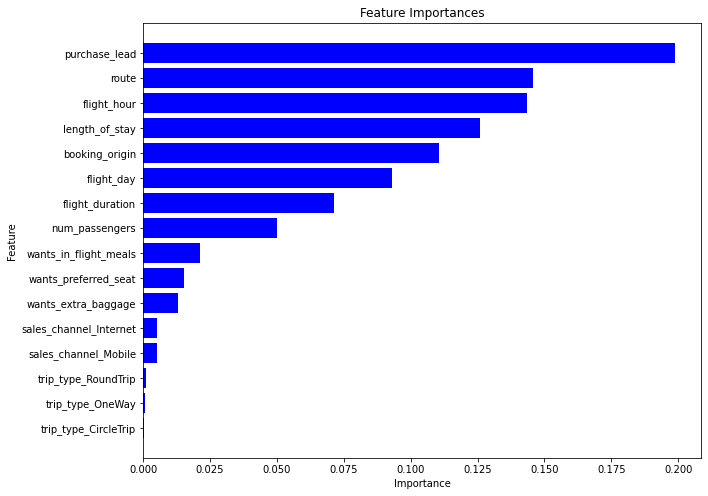

In [126]:
import matplotlib.pyplot as plt

# Sort importance_df by Importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Create horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [55]:
sel_features = importance_df['Feature'].head(8)

In [58]:
X = X[sel_features]

In [60]:
X.describe()

,purchase_lead,route,flight_hour,length_of_stay,booking_origin,flight_day,flight_duration,num_passengers
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,84.940480,0.008099,9.06634,23.04456,0.174742,3.814420,7.277561,1.591240
std,90.451378,0.011836,5.41266,33.88767,0.141094,1.992792,1.496863,1.020165
min,0.000000,0.000020,0.00000,0.00000,0.000020,1.000000,4.670000,1.000000
25%,21.000000,0.001620,5.00000,5.00000,0.047380,2.000000,5.620000,1.000000
50%,51.000000,0.004540,9.00000,17.00000,0.143480,4.000000,7.570000,1.000000
75%,115.000000,0.009300,13.00000,28.00000,0.357440,5.000000,8.830000,2.000000
max,867.000000,0.053600,23.00000,778.00000,0.357440,7.000000,9.500000,9.000000


In [62]:
X_scaled = scaler.fit_transform(X)

In [71]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state=42)
cross_val_scores = cross_val_score(rf_classifier, X_scaled, y, cv=kf)

print("cross validation score: ", cross_val_scores)

cross validation score:  [0.8521 0.8477 0.8495 0.8498 0.8527]


In [72]:
print("mean cv score: ", np.mean(cross_val_scores))
print("std of cv score: ", np.std(cross_val_scores))

mean cv score:  0.85036
std of cv score:  0.0018238420984284713


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.8498 0.7948 0.7157 0.3801 0.6353]
Average cross-validation score: 0.6751400000000001


In [81]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8563
Confusion Matrix:
[[8387  133]
 [1304  176]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.57      0.12      0.20      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.56     10000
weighted avg       0.82      0.86      0.81     10000



# Dropping all Categorical values

In [113]:
df = pd.read_csv("C:/Users/Yash/Desktop/DS_BritishAirways/customer_booking.csv", encoding='latin1')

In [114]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [115]:
df = df.select_dtypes(exclude = ['object','category'])

In [116]:
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0
49996,1,111,6,4,0,0,0,5.62,0
49997,1,24,6,22,0,0,1,5.62,0
49998,1,15,6,11,1,0,1,5.62,0


In [117]:
X = df.drop(columns = ['booking_complete'], axis=1)
y = df['booking_complete']

In [89]:
pipeline = Pipeline([('scaler',StandardScaler()),
                    ('classifier',RandomForestClassifier(n_estimators=100, random_state=42))])

In [98]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

In [104]:
cv_results = cross_validate(pipeline, X, y, cv = 5, scoring=scoring)

In [106]:
print("Cross-validation scores for each fold:")
print(f"Accuracy: {cv_results['test_accuracy']}")
print(f"Precision: {cv_results['test_precision']}")
print(f"Recall: {cv_results['test_recall']}")
print(f"F1 Score: {cv_results['test_f1']}")

print("\nAverage cross-validation scores:")
print(f"Average Accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Average Precision: {np.mean(cv_results['test_precision'])}")
print(f"Average Recall: {np.mean(cv_results['test_recall'])}")
print(f"Average F1 Score: {np.mean(cv_results['test_f1'])}")

Cross-validation scores for each fold:
Accuracy: [0.8489 0.8247 0.7669 0.3841 0.3697]
Precision: [0.6114247  0.53067838 0.42581213 0.36191791 0.57935518]
Recall: [0.50539954 0.5101931  0.4542106  0.2296909  0.61150682]
F1 Score: [0.47380795 0.49897152 0.43904284 0.27932065 0.36527454]

Average cross-validation scores:
Average Accuracy: 0.63886
Average Precision: 0.5018376608356034
Average Recall: 0.46220019281266894
Average F1 Score: 0.4112834979108788


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)

In [120]:
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state= 42)

In [121]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [122]:
y_pred = rf_classifier.predict(X_test)

In [123]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8411
Precision: 0.5963429348357308
Recall: 0.5243100494861058
F1 Score: 0.5171316318316188
